# 🛒 E-Commerce Data Analysis Project

## Project Objective
The goal of this project is to analyze e-commerce sales data to understand customer behavior, product performance, and operational efficiency.  
We use SQL for data extraction and joins, and Python for analysis and visualization.

## Datasets
The following datasets are available:

| Dataset        | Description |
|----------------|-------------|
| `customers`    | Customer demographic and location data |
| `geolocation`  | Geographical coordinates of zip codes |
| `order_items`  | Details of products included in each order |
| `orders`       | Order timestamps, status, and delivery info |
| `payments`     | Payment type and transaction amounts |
| `products`     | Product details, dimensions, and categories |
| `sellers`      | Seller details and locations |

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine, inspect
from ingestion_db import engine

In [2]:
inspector = inspect(engine)

In [3]:
table_names = inspector.get_table_names()

In [4]:
print(f"Tables found in the database: {table_names}")

Tables found in the database: ['customers', 'geolocation', 'order_items', 'orders', 'payments', 'products', 'sellers']


In [5]:
print("--- Record Count for All Tables ---")
try:
    for table in table_names:
        print('-'*50, f'{table}', '-'*50)
        print('Count of records:', pd.read_sql(f"SELECT COUNT(*) AS count FROM {table}", engine)['count'].values[0])
        display(pd.read_sql(f'SELECT * FROM {table} LIMIT 5', engine))
except Exception as e:
    # LOOK FOR THIS OUTPUT!
    # This line prints the actual reason for the failure.
    print(f"❌ An error occurred, triggering the rollback. Reason: {e}")

--- Record Count for All Tables ---
-------------------------------------------------- customers --------------------------------------------------
Count of records: 99441


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


-------------------------------------------------- geolocation --------------------------------------------------
Count of records: 1000163


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


-------------------------------------------------- order_items --------------------------------------------------
Count of records: 112650


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


-------------------------------------------------- orders --------------------------------------------------
Count of records: 99441


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


-------------------------------------------------- payments --------------------------------------------------
Count of records: 103886


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


-------------------------------------------------- products --------------------------------------------------
Count of records: 32951


,product_id,product_category,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,Art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,sport leisure,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,babies,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,housewares,37.0,402.0,4.0,625.0,20.0,17.0,13.0


-------------------------------------------------- sellers --------------------------------------------------
Count of records: 3095


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


# Data cleaning

**Look for missing values in the products table (e.g., product_category_name, dimensions)**

In [6]:
from sqlalchemy import text
with engine.connect() as connection:
    # The 'begin()' block ensures your change is saved (committed)
    with connection.begin() as transaction:
        connection.execute(text("""
            UPDATE products
            SET product_category = 'unknown'
            WHERE product_category IS NULL
        """))

In [7]:
unknown_category = pd.read_sql_query("""SELECT product_id, product_category FROM products WHERE product_category = 'unknown'""", engine)
unknown_category

,product_id,product_category
0,a41e356c76fab66334f36de622ecbd3a,unknown
1,d8dee61c2034d6d075997acef1870e9b,unknown
2,56139431d72cd51f19eb9f7dae4d1617,unknown
3,46b48281eb6d663ced748f324108c733,unknown
4,5fb61f482620cb672f5e586bb132eae9,unknown
...,...,...
605,b0a0c5dd78e644373b199380612c350a,unknown
606,10dbe0fbaa2c505123c17fdc34a63c56,unknown
607,bd2ada37b58ae94cc838b9c0569fecd8,unknown
608,fa51e914046aab32764c41356b9d4ea4,unknown


**Observation: There are 610 NULL value in product_category column of products table which are replaced by UNKNOWN**

# EDA

# Customer Behhaviour Analysis

---
### Identify top states and cities by customer count, This query helps in targeted marketing and understanding regional demand.
---

In [8]:
top_regions= pd.read_sql_query("""SELECT customer_city, customer_state, COUNT(customer_id) AS customer_count FROM customers
GROUP BY customer_city, customer_state
ORDER BY customer_count DESC
LIMIT 10""", engine)
top_regions

,customer_city,customer_state,customer_count
0,sao paulo,SP,15540
1,rio de janeiro,RJ,6882
2,belo horizonte,MG,2773
3,brasilia,DF,2131
4,curitiba,PR,1521
5,campinas,SP,1444
6,porto alegre,RS,1379
7,salvador,BA,1245
8,guarulhos,SP,1189
9,sao bernardo do campo,SP,938


**These are the top 10 States and cities have largest number of customers**

---
### Calculate average time between two purchases for each customer
---

In [9]:
avg_purchasing_time = pd.read_sql_query("""with cte AS(
                  SELECT c.customer_id, o.order_purchase_timestamp,
                  LAG(o.order_purchase_timestamp) OVER(PARTITION BY c.customer_id ORDER BY o.order_purchase_timestamp) AS prev_date
                  FROM customers c 
                  JOIN orders o ON o.customer_id = c.customer_id
                  )
                  SELECT customer_id,
                  AVG(DATEDIFF(order_purchase_timestamp, prev_date)) AS avg_gap_days
                  FROM cte
                  GROUP BY customer_id
                  ORDER BY customer_id """, engine)
avg_purchasing_time

,customer_id,avg_gap_days
0,00012a2ce6f8dcda20d059ce98491703,None
1,000161a058600d5901f007fab4c27140,None
2,0001fd6190edaaf884bcaf3d49edf079,None
3,0002414f95344307404f0ace7a26f1d5,None
4,000379cdec625522490c315e70c7a9fb,None
...,...,...
99436,fffecc9f79fd8c764f843e9951b11341,None
99437,fffeda5b6d849fbd39689bb92087f431,None
99438,ffff42319e9b2d713724ae527742af25,None
99439,ffffa3172527f765de70084a7e53aae8,None


**Observation: Each customer has only one order in dataset**

---
### RFM Analysis: Segment customers based on Recency (last purchase date), Frequency (number of orders), and Monetary value (total spending). This quey helps to identify loyal customers, at-risk customers, and potential high-value customers.
---

In [10]:
RFM = pd.read_sql_query("""SELECT o.customer_id, MAX(o.order_purchase_timestamp) AS last_order, SUM(p.payment_value) AS total_spending
                        FROM orders o
                        JOIN payments p ON p.order_id = o.order_id
                        GROUP BY o.customer_id
                        order by last_order DESC""", engine)
RFM

,customer_id,last_order,total_spending
0,a4b417188addbc05b26b72d5e44837a1,2018-10-17 17:30:18,89.71
1,856336203359aa6a61bf3826f7d84c49,2018-10-16 20:16:02,222.03
2,4c2ec60c29d10c34bd49cb88aa85cfc4,2018-10-03 18:55:29,197.55
3,bf6181a85bbb4115736c0a8db1a53be3,2018-10-01 15:30:09,80.38
4,2823ffda607a2316375088e0d00005ec,2018-09-29 09:13:03,137.03
...,...,...,...
99435,355077684019f7f60a031656bd7262b8,2016-10-03 09:44:50,45.46
99436,b106b360fe2ef8849fbbd056f777b4d5,2016-10-02 22:07:52,109.34
99437,622e13439d6b5a0b486c435618b2679e,2016-09-13 15:24:19,40.95
99438,683c54fc24d40ee9f8a6fc179fd9856c,2016-09-05 00:15:34,75.06


---
### Calculate the moving average of a order values for each customers over their order history.
---

In [11]:
move_avg_order_values = pd.read_sql_query("""SELECT customer_id, order_purchase_timestamp, payment_value,
AVG(payment_value) OVER(PARTITION BY customer_id ORDER BY order_purchase_timestamp ROWS BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW) AS move_avg
FROM (SELECT o.customer_id, o.order_purchase_timestamp, p.payment_value
FROM orders o 
JOIN payments p ON o.order_id = p.order_id) AS data""", engine)

move_avg_order_values

,customer_id,order_purchase_timestamp,payment_value,move_avg
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.74
1,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.41,67.41
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,195.42,195.42
3,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20,179.35,179.35
4,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17,107.01,107.01
...,...,...,...,...
103881,fffecc9f79fd8c764f843e9951b11341,2018-03-29 16:59:26,0.64,27.12
103882,fffeda5b6d849fbd39689bb92087f431,2018-05-22 13:36:02,63.13,63.13
103883,ffff42319e9b2d713724ae527742af25,2018-06-13 16:57:05,214.13,214.13
103884,ffffa3172527f765de70084a7e53aae8,2017-09-02 11:53:32,45.50,45.50


---
### Detect customers whose purchase amount is higher than their historical 90th percentile
---

In [12]:
pd.read_sql_query("""with ranked_orders AS (
                  SELECT o.customer_id, p.payment_value,
                  PERCENT_RANK() OVER(PARTITION BY o.customer_id ORDER BY p.payment_value ASC) AS percentile_rank
                  FROM orders o 
                  JOIN payments p ON p.order_id = o.order_id
                  )
                  SELECT customer_id, payment_value, percentile_rank
                  FROM ranked_orders
                  WHERE percentile_rank > 0.90""", engine)

,customer_id,payment_value,percentile_rank
0,001051abfcfdbed9f87b4266213a5df1,32.03,1.0
1,004937d0f9d6ce15c2830c00c2f482e5,63.95,1.0
2,0049e8442c2a3e4a8d1ff5a9549abd53,650.81,1.0
3,006a5d6b5f648f3811fd4fa94d93a67c,38.49,1.0
4,007b18ac9b8a627f259ea78aed981315,41.13,1.0
...,...,...,...
2786,ff4512b27e3f8d9774f6e01ceb951035,89.16,1.0
2787,ff7b32d3da9ed589c9695bc56021b10d,103.79,1.0
2788,ffbf82fe167e7156e06fc1778d6b1cea,89.46,1.0
2789,fff3a5c6d542d52b05f7e4518adf996e,44.63,1.0


---
### Find customers who never placed an order
---

In [13]:
pd.read_sql_query("""SELECT c.customer_id FROM customers c
                  JOIN orders o ON o.customer_id = c.customer_id
                  WHERE o.order_id IS NULL""", engine)

,customer_id


**Observation: Every customer in our databse has palced an order**

---
### Find churned customers(no orders in the last 6 months)
---

In [14]:
churned_customers = pd.read_sql_query("""SELECT customer_id
                  FROM orders
                  GROUP BY customer_id
                  HAVING DATEDIFF('2018-12-31', MAX(order_purchase_timestamp)) > 180 """, engine)

churned_customers

,customer_id
0,9ef432eb6251297304e76186b10a928d
1,f88197465ea7920adcdbec7375364d82
2,8ab97904e6daea8866dbdbc4fb7aad2c
3,503740e9ca751ccdda7ba28e9ab8f608
4,ed0271e0b7da060a393796590e7b737a
...,...
87184,39bd1228ee8140590ac3aca26f2dfe00
87185,1fca14ff2861355f6e5f14306ff977a7
87186,1aa71eb042121263aafbe80c1b562c9c
87187,b331b74b18dc79bcdf6532d51e1637c1


# Products and Orders Analysis

---
### Count the number of orders placed in each years
---

In [15]:
# pd.read_sql_query("SELECT COUNT(order_id) AS order_count, YEAR(order_purchase_timestamp) AS years FROM orders GROUP BY years HAVING years = 2017", engine)
years_orders_counts = pd.read_sql_query("""SELECT YEAR(order_purchase_timestamp) AS years, COUNT(order_id) AS order_count
FROM orders 
GROUP BY years
ORDER BY years DESC""", engine)

years_orders_counts

,years,order_count
0,2018,54011
1,2017,45101
2,2016,329


---
### Find the average number of products per order, grouped by customer city.
---

In [16]:
orders_per_city = pd.read_sql_query("""with count_per_order AS (
SELECT o.order_id, o.customer_id, COUNT(oi.order_id) AS order_count FROM orders o 
JOIN order_items oi ON o.order_id = oi.order_id
GROUP BY o.order_id, o.customer_id
)
SELECT c.customer_city, ROUND(AVG(cp.order_count),2) AS avg_orders FROM customers c
JOIN count_per_order cp ON c.customer_id = cp.customer_id
GROUP BY c.customer_city
ORDER BY avg_orders DESC""", engine)
orders_per_city.head(10)

,customer_city,avg_orders
0,padre carvalho,7.0
1,celso ramos,6.5
2,candido godoi,6.0
3,datas,6.0
4,matias olimpio,5.0
5,morro de sao paulo,4.0
6,cidelandia,4.0
7,picarra,4.0
8,teixeira soares,4.0
9,curralinho,4.0


---
### Identify the correlation between product price and the number of times a product has been purchased.
---

In [17]:
# Find the correlation

df = pd.read_sql_query("""SELECT p.product_category AS category, COUNT(oi.product_id) AS times_of_order, ROUND(AVG(oi.price)) AS price
FROM products p JOIN order_items oi ON p.product_id = oi.product_id
GROUP BY p.product_category;""",engine)

corr = np.corrcoef(df['times_of_order'], df['price'])
corr[0,-1]

np.float64(-0.10643950249375136)

**Observation: If price of product is getting increase then less time of product will be purchases**

---
### Identify bottlenecks by comparing actual vs. estimated delivery times across different States.
---

In [18]:
bottlenecks_df = pd.read_sql_query("""with cte AS (
SELECT c.customer_state,
AVG(DATEDIFF(o.order_delivered_customer_date, o.order_purchase_timestamp)) AS avg_delivery_days,
AVG(DATEDIFF(o.order_estimated_delivery_date, order_delivered_customer_date)) AS avg_lateness_days
FROM customers c
JOIN orders o ON c.customer_id = o.customer_id
WHERE o.order_status = 'delivered'
AND o.order_delivered_customer_date IS NOT NULL
GROUP BY c.customer_state
)
SELECT customer_state, avg_delivery_days, avg_lateness_days
FROM cte 
WHERE avg_delivery_days > avg_lateness_days
ORDER BY avg_lateness_days DESC; """, engine)

bottlenecks_df

,customer_state,avg_delivery_days,avg_lateness_days
0,AC,21.0000,20.7250
1,AP,27.1791,19.6866
2,AM,26.3586,19.5655
3,RR,29.3415,17.2927
4,MT,18.0034,14.3634
5,PA,23.7252,14.0666
6,RS,15.2485,13.9104
7,RN,19.2236,13.6498
8,PE,18.3955,13.2938
9,PB,20.3888,13.2611


**Observation: these States are the problem areas. On average, deliveries to these states arrive more days later than promised, indicating a severe failure in either the logistics chain or the delivery estimation system for that region.**

---
### Find the average days take to delivered the product
--- 

In [19]:
avg_deliv_time = pd.read_sql_query("""with delivery_time_taken AS 
                                   (SELECT DATEDIFF(order_delivered_customer_date, order_purchase_timestamp) AS delivery_time
                                    FROM
                                    orders
                                    WHERE
                                    order_delivered_customer_date IS NOT NULL
                                    AND order_purchase_timestamp IS NOT NULL
                                   )
                                   SELECT AVG(delivery_time) AS avg_deliver_time
                                   FROM delivery_time_taken""", engine)
avg_deliv_time

,avg_deliver_time
0,12.4973


**Observation: Here we observed that The delivery took approximately 12 days and 12 hours.**

# Sales & Revenue

---
### Find the total Sales per category
---

In [20]:
sales_by_category = pd.read_sql_query("""SELECT LOWER(p.product_category) categories, ROUND(SUM(pay.payment_value), 2) sales FROM products p 
                  JOIN order_items oi ON p.product_id = oi.product_id 
                  JOIN payments pay ON pay.order_id = oi.order_id 
                  GROUP BY categories""", engine)
sales_by_category

,categories,sales
0,perfumery,506738.66
1,furniture decoration,1430176.39
2,telephony,486882.05
3,bed table bath,1712553.67
4,automotive,852294.33
...,...,...
69,cds music dvds,1199.43
70,la cuisine,2913.53
71,fashion children's clothing,785.67
72,pc gamer,2174.43


--------
### Calculate the cumulative sales per month for each year
--------

In [21]:
cumulative_sales = pd.read_sql_query("""with cte AS (
SELECT YEAR(o.order_purchase_timestamp) AS years,
month(o.order_purchase_timestamp) AS months, ROUND(SUM(p.payment_value)) AS payments 
FROM orders o 
JOIN payments p ON p.order_id = o.order_id
GROUP BY years, months
)
SELECT years, months, payments,
SUM(payments) OVER(PARTITION BY years ORDER BY months) AS cummulative
FROM cte""", engine)

cumulative_sales

,years,months,payments,cummulative
0,2016,9,252.0,252.0
1,2016,10,59090.0,59342.0
2,2016,12,20.0,59362.0
3,2017,1,138488.0,138488.0
4,2017,2,291908.0,430396.0
5,2017,3,449864.0,880260.0
6,2017,4,417788.0,1298048.0
7,2017,5,592919.0,1890967.0
8,2017,6,511276.0,2402243.0
9,2017,7,592383.0,2994626.0


---
### Calculate the year-over-year growth rate of total sales.
---

In [22]:
yoy_growth = pd.read_sql_query("""with cte AS (
SELECT YEAR(o.order_purchase_timestamp) AS years, 
ROUND(SUM(p.payment_value)) AS payments 
FROM orders o 
JOIN payments p ON p.order_id = o.order_id
GROUP BY years
)
SELECT years, payments-LAG(payments) OVER( ORDER BY years) AS yoy_growth
FROM cte""", engine)

yoy_growth

,years,yoy_growth
0,2016,NaN
1,2017,7190385.0
2,2018,1450016.0


---
### Get the total revenue and the number of orders per region
---

In [23]:
revenue_by_region = pd.read_sql_query("""SELECT c.customer_city, COUNT(o.order_id) AS order_count, SUM(p.payment_value) AS total_revenue
                  FROM customers c
                  JOIN orders o ON o.customer_id = c.customer_id
                  JOIN payments p ON p.order_id = o.order_id
                  GROUP BY c.customer_city""", engine)
revenue_by_region[0:10]

,customer_city,order_count,total_revenue
0,sao paulo,16221,2203373.09
1,juiz de fora,441,75830.85
2,campos dos goytacazes,258,40212.11
3,itaberaba,10,1286.19
4,cornelio procopio,24,2705.58
5,serra,295,42965.77
6,contagem,448,58947.14
7,santa rosa de lima,3,232.79
8,belo horizonte,2872,421765.12
9,conselheiro lafaiete,102,11192.38


---
### Calculate the percentage of total revenue contributed by each product category.
---

In [24]:
revenue_by_categories = pd.read_sql_query("""SELECT LOWER(p.product_category) categories, ROUND(SUM(pay.payment_value)*100/(SELECT SUM(payment_value) FROM payments),2) sales_perc FROM products p 
JOIN order_items oi ON p.product_id = oi.product_id 
JOIN payments pay ON pay.order_id = oi.order_id 
GROUP BY categories
ORDER BY sales_perc DESC""", engine)
revenue_by_categories

,categories,sales_perc
0,bed table bath,10.70
1,health beauty,10.35
2,computer accessories,9.90
3,furniture decoration,8.93
4,watches present,8.93
...,...,...
69,house comfort 2,0.01
70,cds music dvds,0.01
71,pc gamer,0.01
72,fashion children's clothing,0.00


---
### Analyze the distribution of payment_type(credit card, boleto, etc.) and see the average order value (payment_value).
---

In [25]:
payment_distribution = pd.read_sql_query("""SELECT payment_type, ROUND(AVG(payment_value), 2) AS avg_order_value
FROM payments
GROUP BY payment_type
HAVING avg_order_value > 0""", engine)
payment_distribution

,payment_type,avg_order_value
0,credit_card,163.32
1,UPI,145.03
2,voucher,65.70
3,debit_card,142.57


---
### Calculate the percentage of orders that were paid in installments
---

In [26]:
paid_in_installments = pd.read_sql_query("""SELECT (SUM(CASE WHEN payment_installments >=1 then 1
                  else 0 end))/COUNT(*)*100 AS perc
                  FROM payments""", engine)
paid_in_installments

,perc
0,99.9981


**Observation: There are more than 99% orders that paid in installments**

---
### Insight: Rank sellers by sales revenue, and average shipping time ($shipping\_limit\_date$ vs $order\_delivered\_carrier\_date$). This query helps in managing seller relationships and quality control.
---

In [27]:
seller_relationship_df = pd.read_sql_query("""with cte AS (SELECT
    s.seller_id,
    SUM(oi.price) AS total_revenue,
    COUNT(oi.order_item_id) AS sales_volume,
    -- Calculating the average time from purchase to handover to carrier
    ROUND(AVG(DATEDIFF(o.order_purchase_timestamp, o.order_delivered_carrier_date)),2) AS avg_handling_days,
    -- Calculating if the seller shipped before (positive) or after (negative) the deadline
    ROUND(AVG(DATEDIFF(o.order_delivered_carrier_date, oi.shipping_limit_date)),2) AS avg_days_before_deadline
FROM
    sellers AS s
JOIN
    order_items AS oi ON s.seller_id = oi.seller_id
JOIN
    orders AS o ON oi.order_id = o.order_id
WHERE
    -- Ensure we only look at orders that have been processed by the seller
    o.order_delivered_carrier_date IS NOT NULL
GROUP BY
    s.seller_id
HAVING
    COUNT(oi.order_item_id) > 10 -- Optional: Filters for sellers with a meaningful number of sales
)
SELECT seller_id, total_revenue, sales_volume, avg_handling_days, avg_days_before_deadline
FROM cte                                                                                     
ORDER BY
    total_revenue DESC -- Ranks the most valuable sellers at the top""", engine)

seller_relationship_df

,seller_id,total_revenue,sales_volume,avg_handling_days,avg_days_before_deadline
0,4869f7a5dfa277a7dca6462dcf3b52b2,229237.63,1155,-2.75,-3.35
1,53243585a1d6dc2643021fd1853d8905,220199.44,404,-3.51,-2.86
2,4a3ca9315b744ce9f8e9374361493884,200383.02,1986,-2.73,-3.15
3,fa1c13f2614d7b5c4749cbc52fecda94,192553.33,583,-2.64,-2.98
4,7c67e1448b00f6e969d365cea6b010ab,187473.91,1362,-12.16,-2.02
...,...,...,...,...,...
1283,184a67a8f9f63234d3a92340bbdb727f,268.66,11,-6.36,0.27
1284,5c853bb56f70f4d14218944bae111d7a,263.13,24,-3.67,-3.71
1285,2e0dba2da448400b1c11d7b4b22f32a4,235.87,13,-2.92,-3.15
1286,e819bcfade7b5d88a27325eb6cfd62c5,202.90,11,-5.64,-4.55


# Visualizations

### Count the number of customers from each state.

<function matplotlib.pyplot.legend(*args, **kwargs) -> 'Legend'>

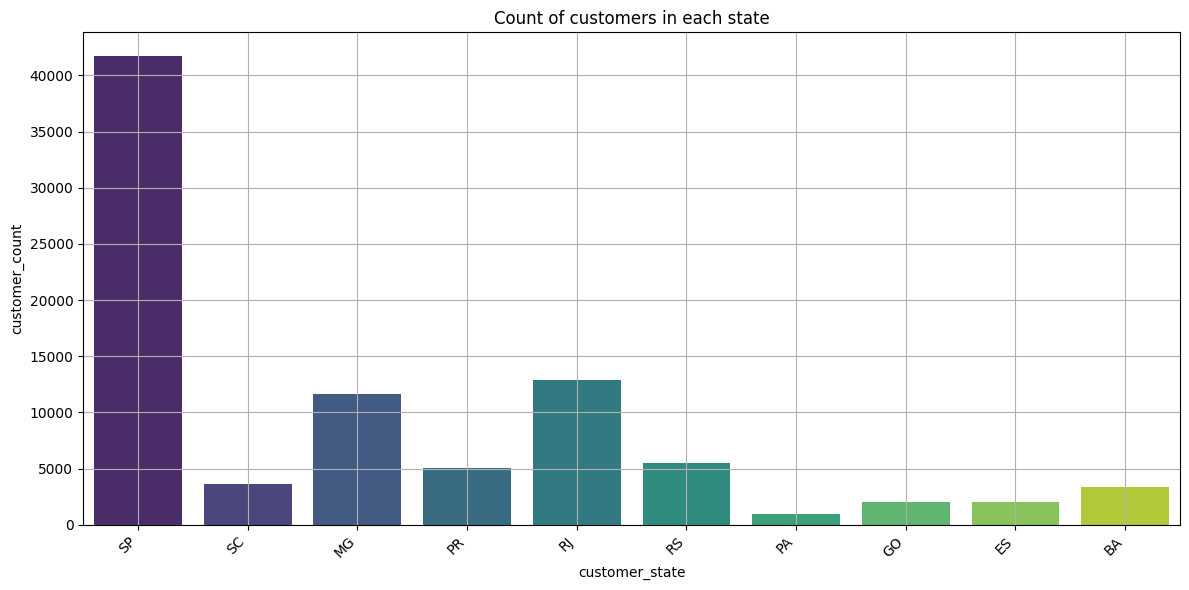

In [28]:
customer_count_state = pd.read_sql_query(""" SELECT COUNT(customer_id) AS customer_count, customer_state
                       FROM customers
                  GROUP BY customer_state""", engine)
top_10 = customer_count_state.head(10)

plt.figure(figsize = (12,6))
plt.title('Count of customers in each state')
sns.barplot(x ="customer_state",y= "customer_count", hue = 'customer_state', data = top_10, palette='viridis')
plt.xticks(rotation= 45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.legend


# Calculative the number of orders per month in 2018.

[Text(0, 0, '7269'),
 Text(0, 0, '6728'),
 Text(0, 0, '7211'),
 Text(0, 0, '6939'),
 Text(0, 0, '6873'),
 Text(0, 0, '6167'),
 Text(0, 0, '6292'),
 Text(0, 0, '6512'),
 Text(0, 0, '16'),
 Text(0, 0, '4')]

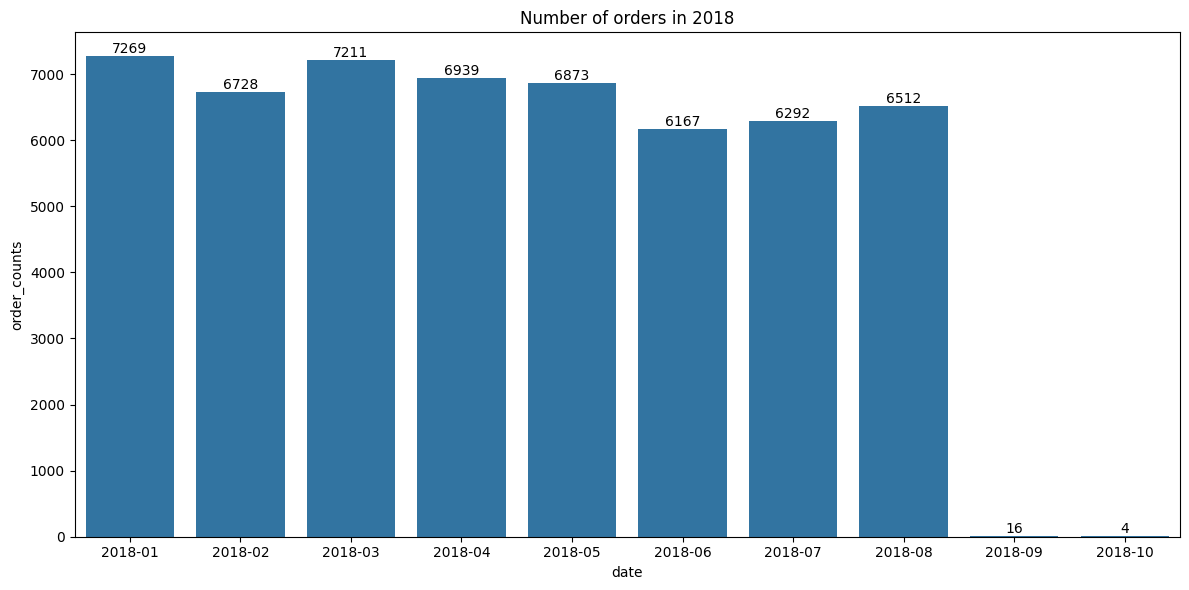

In [29]:
monthly_order = pd.read_sql_query("""SELECT DATE_FORMAT(order_purchase_timestamp, '%Y-%m') AS date, COUNT(order_id) AS order_counts 
                  FROM orders
                  GROUP BY date
                  HAVING date = 2018
                  ORDER BY date ASC""", engine)
monthly_order

plt.figure(figsize=(12,6))
plt.title('Number of orders in 2018')
ax = sns.barplot(y = "order_counts", x = "date", data= monthly_order)
plt.legend
plt.tight_layout()
ax.bar_label(ax.containers[0])

# Calculate the total revenue generated by each seller, and rank them by revenue

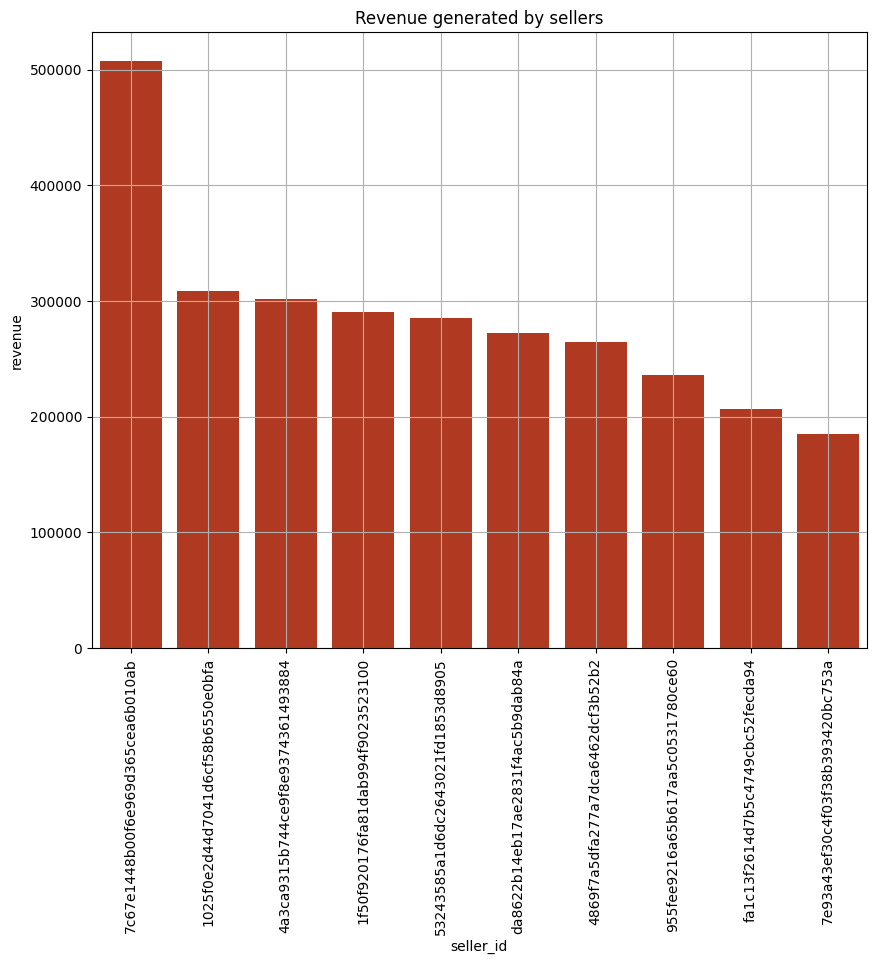

In [30]:
seller_revenue = pd.read_sql_query("""with seller_revenue AS (
SELECT oi.seller_id, ROUND(SUM(p.payment_value), 2) AS revenue
FROM order_items oi 
JOIN payments p on p.order_id = oi.order_id 
GROUP BY oi.seller_id
)
SELECT seller_id, revenue,
RANK() OVER(order by revenue DESC) AS rnk
FROM seller_revenue""", engine)

top_10_sellers = seller_revenue.head(10)
plt.figure(figsize=(10,8))
plt.title('Revenue generated by sellers')
sns.barplot(x = 'seller_id', y = 'revenue', data = top_10_sellers, color='#C82909')
plt.xticks(rotation = 90)
plt.grid()

# Identify the top customers who spent the most money in each year.

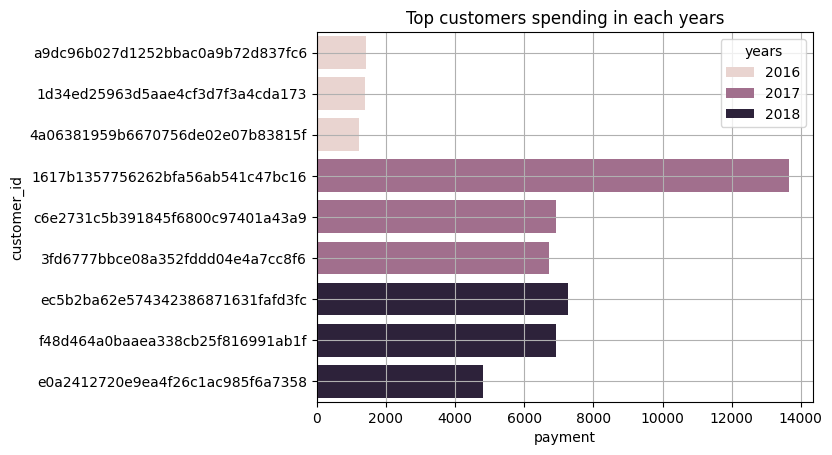

In [31]:
customer_spend = pd.read_sql_query("""with cte AS 
(select year(o.order_purchase_timestamp) years,
o.customer_id,
sum(p.payment_value) payment,
dense_rank() over(partition by year(o.order_purchase_timestamp) order by sum(p.payment_value) desc) d_rank
from orders o join payments p
on p.order_id = o.order_id
group by year(o.order_purchase_timestamp),
o.customer_id)
SELECT customer_id, years ,payment, d_rank
FROM cte
where d_rank <=3""", engine)

plt.title('Top customers spending in each years')
sns.barplot(x = 'payment', y = 'customer_id', hue = 'years', data = customer_spend)
plt.grid()

# Master Table Creation

To streamline analysis and avoid repeating complex joins for every query, we will create a **master dataset** by joining
`orders`, `customers`, `order_items`, `products`, `payments`, and `sellers`.

In [32]:
master_table = pd.read_sql_query('''
SELECT c.customer_id,
	   c.customer_city,
       c.customer_state,
       o.order_id,
       o.order_status,
       o.order_purchase_timestamp,
       o.order_approved_at,
       o.order_delivered_carrier_date,
       o.order_delivered_customer_date,
       o.order_estimated_delivery_date,
       oi.order_item_id,
       oi.product_id,
       oi.seller_id,
       oi.shipping_limit_date,
       oi.price,
       oi.freight_value,
       p.payment_type,
       p.payment_installments,
       p.payment_value,
       pr.product_category,
       s.seller_city,
       s.seller_state
FROM 
customers c JOIN orders o on c.customer_id = o.customer_id
JOIN order_items oi ON o.order_id = oi.order_id 
JOIN payments p ON o.order_id = p.order_id
JOIN products pr ON oi.product_id = pr.product_id
JOIN sellers s ON oi.seller_id = s.seller_id ;
''', engine)

# Add calculated columns
master_table['order_month'] = master_table['order_purchase_timestamp'].dt.to_period('M')
master_table['delivery_days'] = (master_table['order_delivered_customer_date'] - master_table['order_purchase_timestamp']).dt.days
master_table['order_value'] = master_table['price'] + master_table['freight_value']

master_table.head()

,customer_id,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,...,freight_value,payment_type,payment_installments,payment_value,product_category,seller_city,seller_state,order_month,delivery_days,order_value
0,5a3f73cc3e52ab64478beb5ce8756f4b,rio de janeiro,RJ,0132158c30672a8c52997a2492613ec2,delivered,2017-03-13 23:23:23,2017-03-13 23:23:23,2017-03-14 09:35:36,2017-03-15 09:27:54,2017-03-30 00:00:00,...,13.41,credit_card,8,413.31,perfumery,petropolis,RJ,2017-03,1.0,413.31
1,5441451c5c5d190466e7afbf2adc1c19,guarulhos,SP,026a69b8c98fbfc61de9050c41f1dd95,delivered,2018-03-08 09:24:33,2018-03-09 09:28:31,2018-03-10 05:16:40,2018-03-11 18:58:26,2018-03-20 00:00:00,...,15.57,credit_card,3,135.47,automotive,cajamar,SP,2018-03,3.0,135.47
2,0d0ce626603ca795728958e76c79785e,campo grande,MS,023b49300b34f2b9961857266df731dc,delivered,2017-09-21 09:58:40,2017-09-21 10:10:20,2017-09-21 21:40:06,2017-09-28 21:48:49,2017-10-19 00:00:00,...,22.85,credit_card,2,162.75,sport leisure,curitiba,PR,2017-09,7.0,162.75
3,bf0176bae5facd261148fb881ccb8cc6,santana de parnaiba,SP,0159c6355a4e32f6ac68d838e2228150,delivered,2018-06-15 13:41:08,2018-06-15 14:03:58,2018-06-18 12:06:00,2018-06-19 23:21:34,2018-07-03 00:00:00,...,53.11,credit_card,15,242.11,Furniture Kitchen Service Area Dinner and Garden,sao bernardo do campo,SP,2018-06,4.0,242.11
4,746b43bea6d9eb220867694bfe4b800d,cotia,SP,0123098b96f3d4014545642be53d891c,delivered,2017-08-15 11:02:55,2017-08-15 11:30:20,2017-08-22 10:46:58,2017-08-29 23:47:27,2017-09-06 00:00:00,...,17.18,credit_card,2,117.08,Furniture Decoration,santa rita do sapucai,MG,2017-08,14.0,117.08


In [33]:
master_table.describe()

,order_purchase_timestamp,order_delivered_customer_date,order_item_id,price,freight_value,payment_installments,payment_value,delivery_days,order_value
count,117601,115034,117601.000000,117601.000000,117601.000000,117601.000000,117601.000000,115034.000000,117601.000000
mean,2017-12-30 16:19:35.878368512,2018-01-13 06:45:43.565711104,1.195900,120.824783,20.045990,2.939482,172.686752,12.018142,140.870774
min,2016-09-04 21:15:19,2016-10-11 13:46:32,1.000000,0.850000,0.000000,0.000000,0.000000,0.000000,6.080000
25%,2017-09-11 21:42:39,2017-09-25 14:09:30.249999872,1.000000,39.900000,13.080000,1.000000,60.870000,6.000000,55.270000
50%,2018-01-18 13:37:27,2018-02-01 19:17:46,1.000000,74.900000,16.290000,2.000000,108.210000,10.000000,92.120000
75%,2018-05-03 22:43:17,2018-05-15 16:52:09.249999872,1.000000,134.900000,21.190000,4.000000,189.260000,15.000000,157.780000
max,2018-09-03 09:06:57,2018-10-17 13:22:46,21.000000,6735.000000,409.680000,24.000000,13664.080000,209.000000,6929.310000
std,NaN,NaN,0.697706,184.479323,15.861315,2.774223,267.592290,9.459134,191.618329


In [34]:
master_table.isnull().sum()

customer_id                         0
customer_city                       0
customer_state                      0
order_id                            0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  15
order_delivered_carrier_date     1245
order_delivered_customer_date    2567
order_estimated_delivery_date       0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
payment_type                        0
payment_installments                0
payment_value                       0
product_category                    0
seller_city                         0
seller_state                        0
order_month                         0
delivery_days                    2567
order_value                         0
dtype: int64

In [35]:
# Convert dates
date_cols = [
    'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date',
    'order_delivered_customer_date', 'order_estimated_delivery_date', 'shipping_limit_date'
]
for col in date_cols:
    master_table[col] = pd.to_datetime(master_table[col], errors='coerce')

In [36]:
master_table.dtypes

customer_id                              object
customer_city                            object
customer_state                           object
order_id                                 object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
order_item_id                             int64
product_id                               object
seller_id                                object
shipping_limit_date              datetime64[ns]
price                                   float64
freight_value                           float64
payment_type                             object
payment_installments                      int64
payment_value                           float64
product_category                         object
seller_city                             

---
### Some KPIS
---

In [37]:
total_orders = master_table['order_id'].nunique()
total_customers = master_table['customer_id'].nunique()
total_revenue = master_table['payment_value'].sum()
avg_order_value = master_table['payment_value'].mean()

print(f"Total Customers: {total_customers}")
print(f"Total Orders: {total_orders}")
print(f"Total Revenue: {total_revenue:,.2f}")
print(f"Average Order Value: {avg_order_value:,.2f}")

Total Customers: 98665
Total Orders: 98665
Total Revenue: 20,308,134.71
Average Order Value: 172.69


# Master Table Visualizations

---
### Revenue Trend for per month of years
---

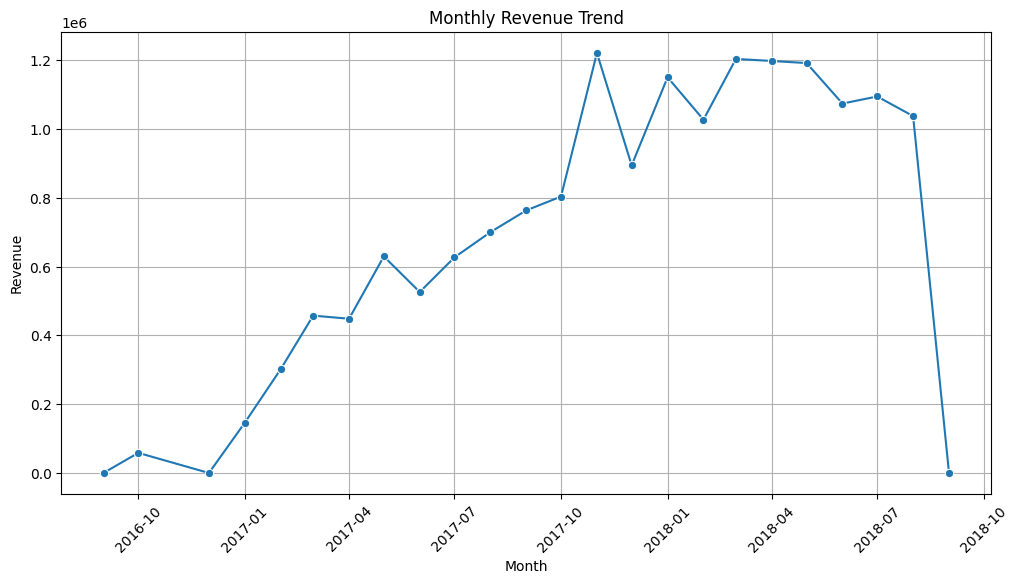

In [43]:
monthly_revenue = master_table.groupby(master_table['order_month'].dt.to_timestamp())['order_value'].sum()
plt.figure(figsize=(12,6))
sns.lineplot(x=monthly_revenue.index, y=monthly_revenue.values, marker="o")
plt.title("Monthly Revenue Trend")
plt.grid(True)
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.show()

---
### Top 10 Product Categories by Revenue
---

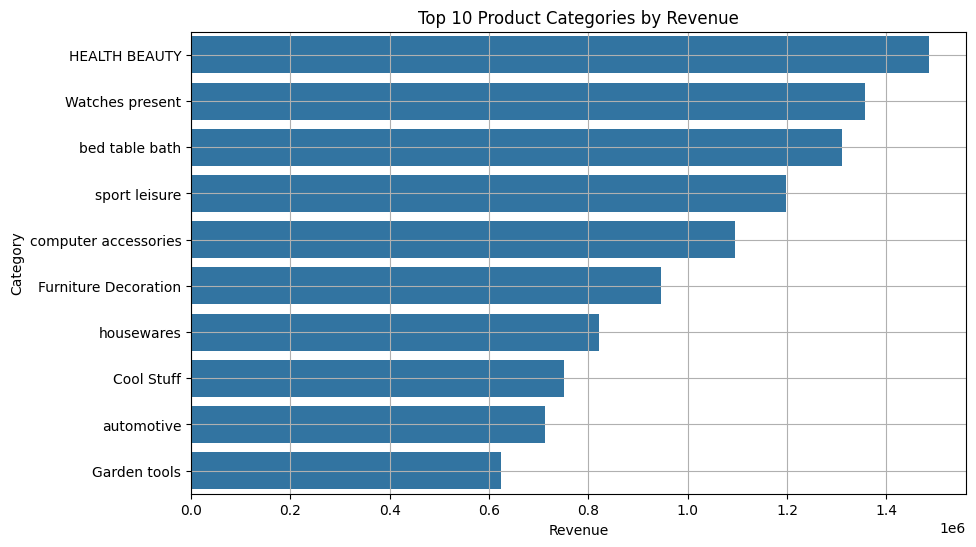

In [45]:
top_categories = master_table.groupby('product_category')['order_value'].sum().nlargest(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_categories.values, y=top_categories.index)
plt.title("Top 10 Product Categories by Revenue")
plt.grid(True)
plt.xlabel("Revenue")
plt.ylabel("Category")
plt.show()

---
### Top 10 States by Revenue
---

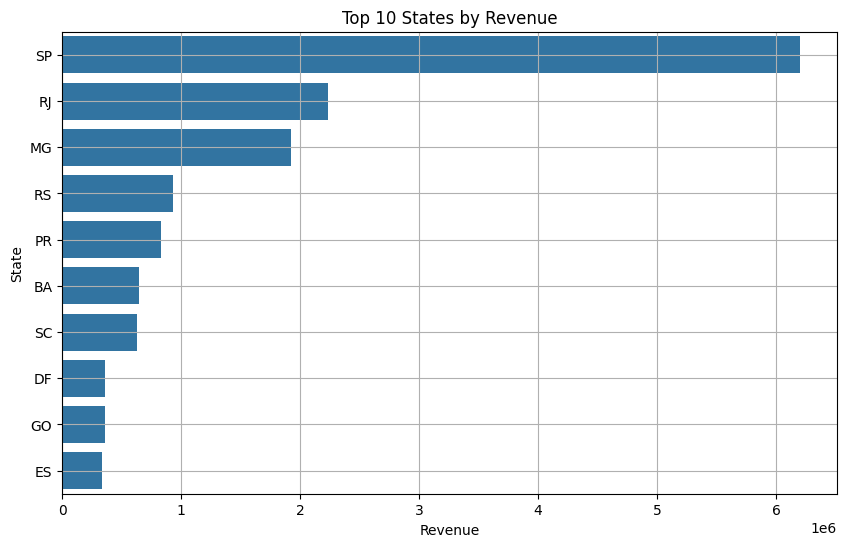

In [44]:
top_states = master_table.groupby('customer_state')['order_value'].sum().nlargest(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_states.values, y=top_states.index)
plt.title("Top 10 States by Revenue")
plt.grid(True)
plt.xlabel("Revenue")
plt.ylabel("State")
plt.show()

---
### Payment Method Distribution
---

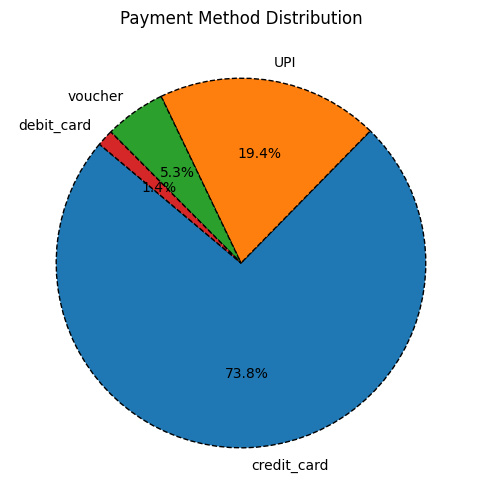

In [41]:
payment_counts = master_table['payment_type'].value_counts()
plt.figure(figsize=(8,6))
plt.title("Payment Method Distribution")
plt.pie(payment_counts.values, labels=payment_counts.index, 
        autopct='%1.1f%%', 
        startangle=140,
        wedgeprops = {'edgecolor': 'black', 'linewidth': 1, 'linestyle': '--'}
        )
plt.show()

---
### Delivery Delay Analysis
---

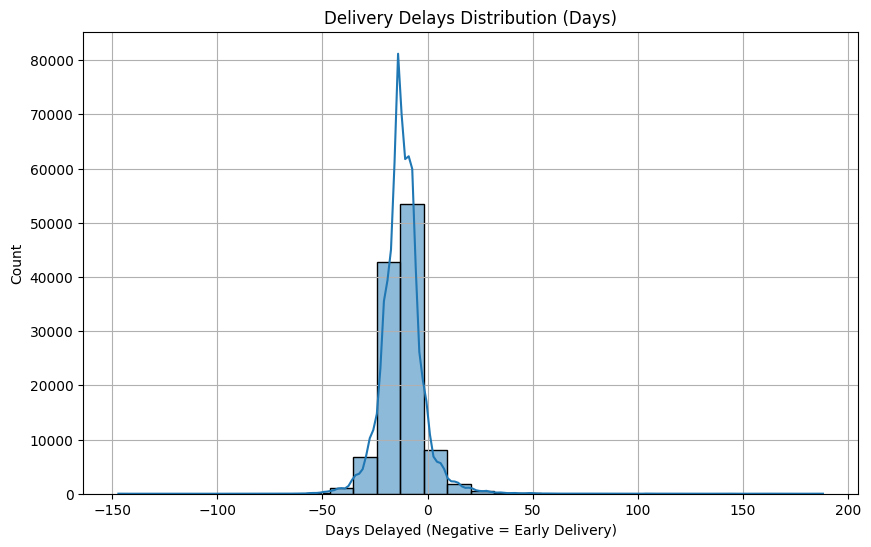

In [46]:
master_table['delay_days'] = (master_table['order_delivered_customer_date'] - master_table['order_estimated_delivery_date']).dt.days

plt.figure(figsize=(10,6))
sns.histplot(master_table['delay_days'].dropna(), bins=30, kde=True)
plt.grid(True)
plt.title("Delivery Delays Distribution (Days)")
plt.xlabel("Days Delayed (Negative = Early Delivery)")
plt.show()

## Overall Observation
1. Total Customers: ~98,665 unique buyers.

2. Total Orders: ~98,665 (on par with customers – mostly 1 order/customer).

3. Total Revenue (GMV): ≈ 20.3 million (sum of item prices).

4. Average Order Value (AOV): ≈ ₹172.69 (or USD equivalent).

5. Delivery Performance: 
      .Median delivery ≈ 10–12 days.
      .Some orders delayed beyond estimated dates.

6. Payment Mix: Strong dominance of credit card payments, followed by boleto and debit.

7. Top Revenue Drivers: Electronics, furniture, and fashion categories lead sales.

8. Regional Insights: Most revenue is concentrated in São Paulo (SP), Rio de Janeiro (RJ), and a few other states.